In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [2]:
data = pd.read_excel('~/Downloads/permutation_importance.xlsx')

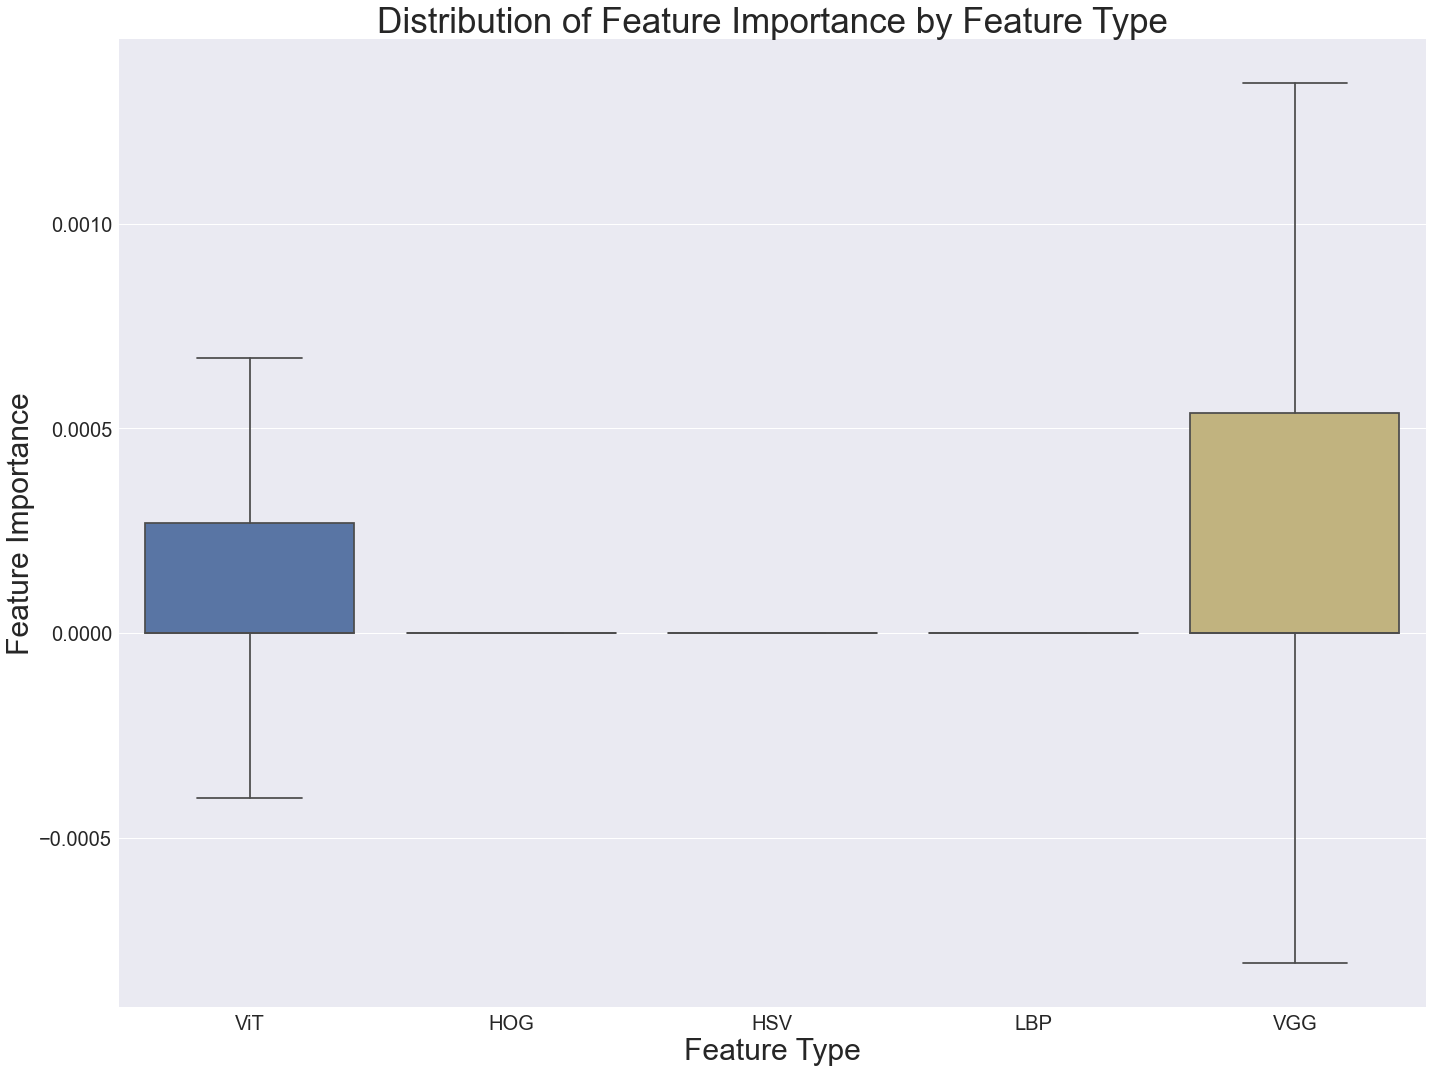

In [19]:
# Extract Feature typE
data['feature_type'] = data['feature'].str.split("_").str[0]

# Create a boxplot
plt.style.use('seaborn')
plt.figure(figsize = (20, 15))
boxplot = sns.boxplot(x = 'feature_type', y = 'mean', data = data, showfliers = False)

plt.title('Distribution of Feature Importance by Feature Type', fontsize = 35)
plt.xlabel('Feature Type', fontsize = 30)
plt.xticks(fontsize = 20)
plt.ylabel('Feature Importance', fontsize = 30)
plt.yticks(fontsize = 20)
plt.tight_layout()
plt.show()

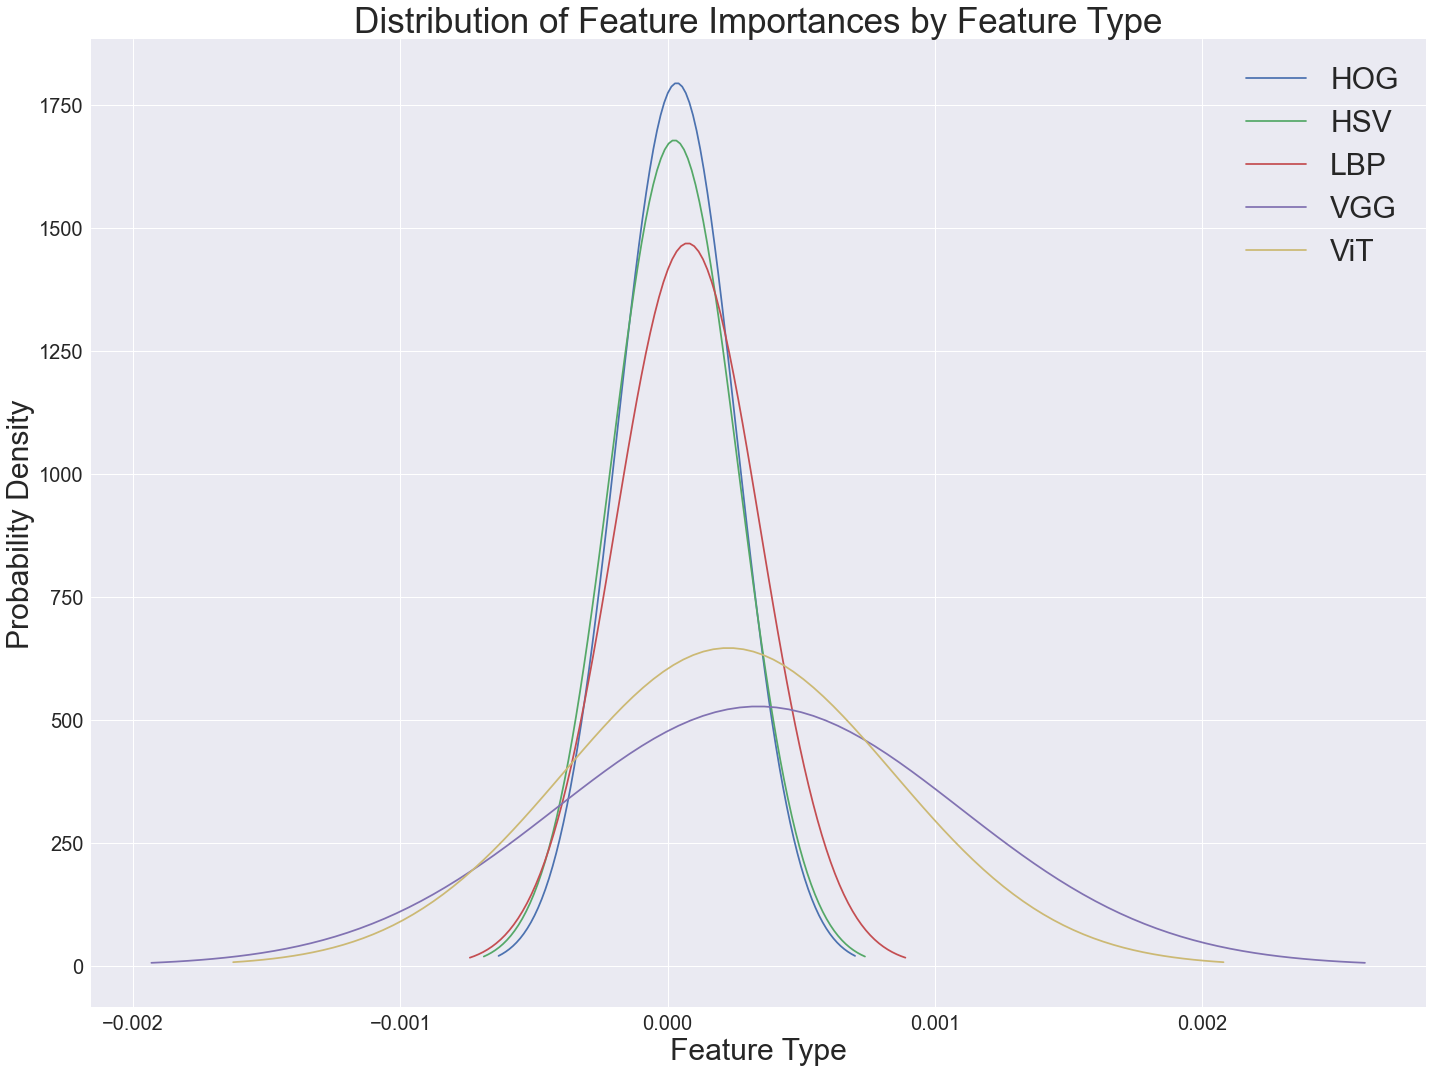

In [29]:
# Bell curve

grouped = data.groupby('feature_type')['mean'].agg(['mean', 'std']).reset_index()

# Create a density plot
plt.style.use('seaborn')
plt.figure(figsize = (20, 15))

# Bell curve
x_values = {}
for _, row in grouped.iterrows():
    x = np.linspace(row['mean'] - 3*row['std'], row['mean'] + 3*row['std'], 100)
    x_values[row['feature_type']] = x
    plt.plot(x, norm.pdf(x, row['mean'], row['std']), label = row['feature_type'])

plt.title('Distribution of Feature Importances by Feature Type', fontsize = 35)
plt.xlabel('Feature Type', fontsize = 30)
plt.xticks(fontsize = 20)
plt.ylabel('Probability Density', fontsize = 30)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 30)
plt.tight_layout()
plt.show()